# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


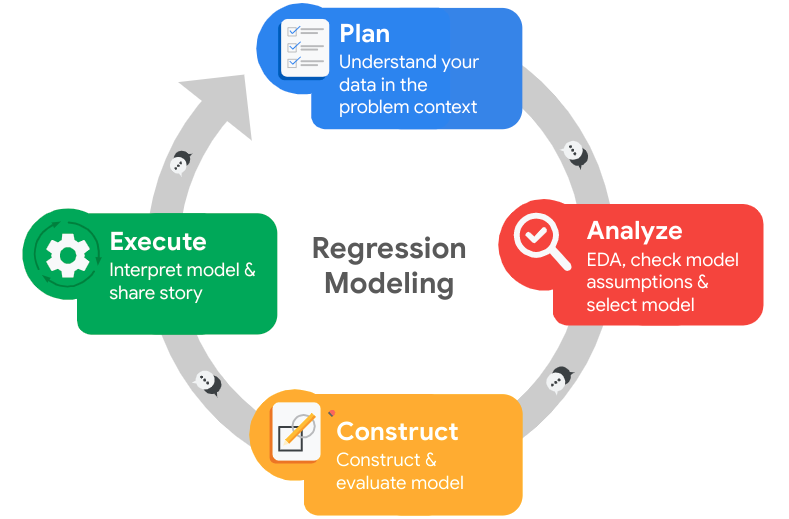

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




Stakeholders for this project include the head of HR at Salifort Motors, as well as potentially the Chief Operating Officer. I am trying to solve the lack of information reguarding churn and provide a predictive model for churn, as well as key variables that could be further examined to increase retention. Initially I notice that there are mostly numerical data, and that our target variable (left) is categorical, leading toward a logistic regression model or machine learning model. The average_monthly_hours can be sorted into further categories, and the number of projects could be sorted into several categories, as well. During this stage, I find myself referring to previous coursework in the Google Advanced Data Analytics course, as well as www.stackoverflow.com if there are coding issues. www.kaggle.com may also be used for referencing in the event of troubleshooting.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import basic DA packages
import numpy as np
import pandas as pd

# Graphing packages
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling/metrics packages
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,\
confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from xgboost import XGBClassifier, plot_importance

# Save models after fitting
import pickle

# Display all columns
pd.set_option('display.max_columns', None)

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = df0.rename(columns={ 'satisfaction_level' : 'satis', 'last_evaluation' : 'eval',
                         'number_project' : 'projects', 'average_montly_hours' : 'avg_mon_hrs',
                         'time_spend_company' : 'years', 'Work_accident' : 'accident',
                         'promotion_last_5years' : 'recent_promotion', 'Department' : 'dpt',
                         })

# Display all column names after the update
df0.columns


Index(['satis', 'eval', 'projects', 'avg_mon_hrs', 'years', 'accident', 'left',
       'recent_promotion', 'dpt', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isnull().sum()


satis               0
eval                0
projects            0
avg_mon_hrs         0
years               0
accident            0
left                0
recent_promotion    0
dpt                 0
salary              0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0.duplicated().sum()


3008

In [9]:
# Inspect some rows containing duplicates as needed
df_duplicates = df0[df0.duplicated()]

df_duplicates.head(10)


,satis,eval,projects,avg_mon_hrs,years,accident,left,recent_promotion,dpt,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates()


# Display first few rows of new dataframe as needed
df1.shape


(11991, 10)

### Check outliers

Check for outliers in the data.

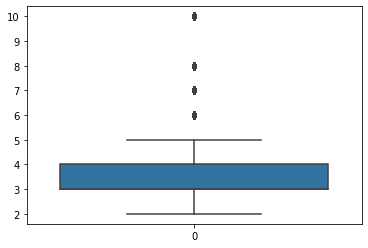

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(data = df1['years']);



In [12]:
# Determine the number of rows containing outliers
print((df1['years']).value_counts())
print('\n')
print((df1['years'] > 5).value_counts())



3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: years, dtype: int64


False    11167
True       824
Name: years, dtype: int64


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())
print()
# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True))


0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [14]:
# Create dummy variables
df2 = pd.get_dummies(data=df1)
df2.head()

# Create dataframe of left and dataframe of stayed
df2_left = df2[(df2['left'] == 1)]
df2_stayed = df2[(df2['left'] == 0)]

# Double check success of new dataframes
print(df2_left['left'].value_counts())
print(df2_stayed['left'].value_counts())

1    1991
Name: left, dtype: int64
0    10000
Name: left, dtype: int64


In [15]:
# Compare both left and stayed summary statistics
df2_left.describe()

,satis,eval,projects,avg_mon_hrs,years,accident,left,recent_promotion,dpt_IT,dpt_RandD,dpt_accounting,dpt_hr,dpt_management,dpt_marketing,dpt_product_mng,dpt_sales,dpt_support,dpt_technical,salary_high,salary_low,salary_medium
count,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.0,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000
mean,0.440271,0.721783,3.883476,208.162230,3.881467,0.052737,1.0,0.004018,0.079357,0.042692,0.054746,0.056755,0.026118,0.056253,0.055249,0.276243,0.156705,0.195881,0.024108,0.589653,0.386238
std,0.265207,0.197436,1.817139,61.295145,0.974041,0.223565,0.0,0.063277,0.270363,0.202213,0.227542,0.231433,0.159525,0.230468,0.228522,0.447251,0.363614,0.396977,0.153425,0.492020,0.487009
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.110000,0.520000,2.000000,146.000000,3.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.410000,0.790000,4.000000,226.000000,4.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.730000,0.910000,6.000000,262.500000,5.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df2_stayed.describe()

,satis,eval,projects,avg_mon_hrs,years,accident,left,recent_promotion,dpt_IT,dpt_RandD,dpt_accounting,dpt_hr,dpt_management,dpt_marketing,dpt_product_mng,dpt_sales,dpt_support,dpt_technical,salary_high,salary_low,salary_medium
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.667365,0.715667,3.786800,198.942700,3.262000,0.174500,0.0,0.019500,0.081800,0.060900,0.051200,0.04880,0.03840,0.056100,0.057600,0.26890,0.150900,0.185400,0.094200,0.456600,0.449200
std,0.217082,0.161919,0.981755,45.665507,1.367239,0.379558,0.0,0.138281,0.274073,0.239159,0.220416,0.21546,0.19217,0.230126,0.232997,0.44341,0.357969,0.388641,0.292121,0.498138,0.497438
min,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


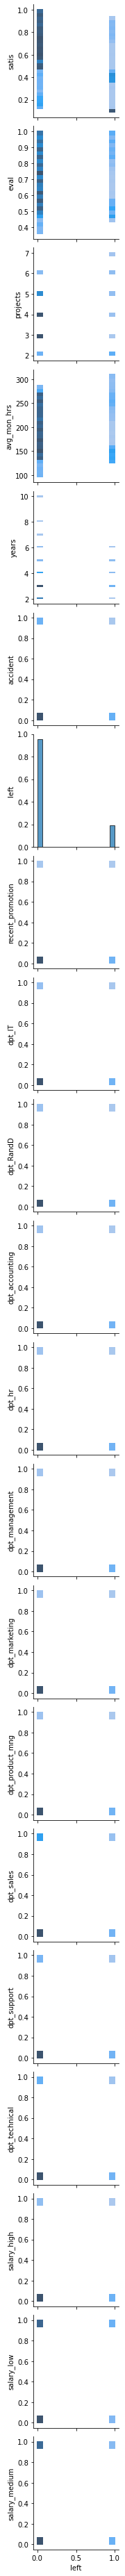

In [17]:
# Create a plot as needed
sns.pairplot(data = df2, kind = 'hist', x_vars = ['left'])


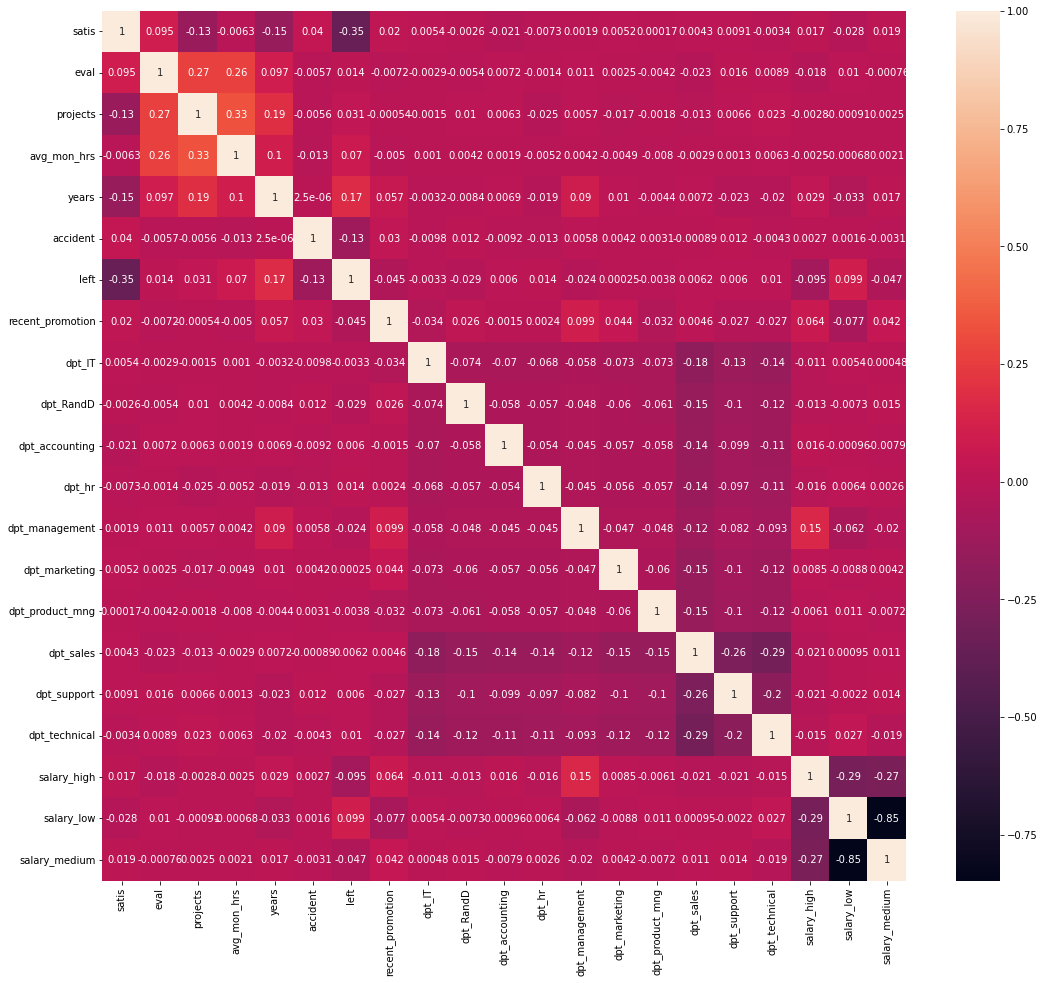

In [18]:
plt.figure(figsize = (18,16))
sns.heatmap(df2.corr(), annot=True)

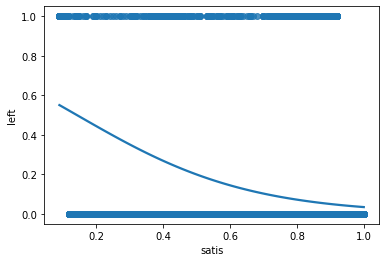

In [19]:
# Create a plot as needed
sns.regplot(x = 'satis', y = 'left', data = df2, logistic = True, ci=None)


In [20]:
# Create a plot as needed
### YOUR CODE HERE ###


In [21]:
# Create a plot as needed
### YOUR CODE HERE ###


In [22]:
# Create a plot as needed
### YOUR CODE HERE ###


In [23]:
# Create a plot as needed
### YOUR CODE HERE ###


In [24]:
# Create a plot as needed
### YOUR CODE HERE ###


### Insights

The highest correlation between any variable and leaving appears to be the satisfaction rating. The next two most impactful variables appear to be years worked and presence of an on-the-job injury. Strangely, on the job injury was negatively correlated with leaving. Workers with low salaries were more likely to leave.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



I don't notice anything particularly odd when examining the dataset. Yes, there are some outliers, but none that are unreasonable and we want our model to be able to be applied across categories of employees. All independent variables were kept in an attempt to generate a more accurate model. Because we're leaving outliers in and accounting for the department seems reasonable, a gradient boosted random forest model seems like a good choice. As far as ethical considerations, there doesn't appear to be any conflict in general ethics.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Predict whether or not an employee will leave.

### Identify the types of models most appropriate for this task.

Gradient boosted random forest works well as a supervised learning model. This works well here because we're dealing with binary categorical target variable.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [28]:
# Define target and predictor variables

y = df2['left']

X = df2.drop(['left'], axis=1)

In [29]:
# Split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25,
                                                    stratify = y, random_state = 0)

In [39]:
# Instantiate XBGClassifier
xgb = XGBClassifier(objective = 'binary:logistic', random_state = 0)

In [40]:
# Define parameters for tuning
cv_params = {'max_depth' : [4,6],
            'min_child_weight': [10,20],
            'learning_rate': [.1,.2,.3],
            'n_estimators':[100, 200, 300],
             'subsample' : [.7],
             'colsample_bytree': [.7]
            }

In [41]:
# Define scoring criteria
scoring = {'accuracy', 'precision', 'recall', 'f1'}

In [51]:
# Construct Grid Search CV
xgb_cv = GridSearchCV(xgb, cv_params, scoring = scoring, cv = 5, refit= 'f1')

In [52]:
%%time
# Fit Grid Search model to training data
xgb_cv.fit(X_train, y_train)

CPU times: user 5min 45s, sys: 1.66 s, total: 5min 47s
Wall time: 2min 55s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     predictor=None, random_state=0,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3], 

In [53]:
# Find best parameters
xgb_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 10,
 'n_estimators': 100,
 'subsample': 0.7}

In [54]:
# Pickle save the model
pickle.dump(xgb_cv, open('xgb.sav', 'wb'))

In [59]:
# Check metrics on prediction of model
y_pred = xgb_cv.predict(X_test)

# Print accuracy score.
ac_score = accuracy_score(y_test, y_pred)
print('Accuracy score XGB model: ', ac_score)

# Print precision score.
pc_score = precision_score(y_test, y_pred)
print('Precision score XGB model: ', pc_score)

# Print recall score.
rc_score = recall_score(y_test, y_pred)
print('Recall score XGB model: ', recall_score(y_test, y_pred))

# Print f1 score. (#f1_score was redefined running previous code as:
# f1_score = f1_score(y_test, y_pred), making it a value instead of a function)

print('F1 score XGB model:', f1_score)

Accuracy score XGB model:  0.9799866577718479
Precision score XGB model:  0.9719827586206896
Recall score XGB model:  0.9056224899598394
F1 score XGB model: 0.9376299376299376


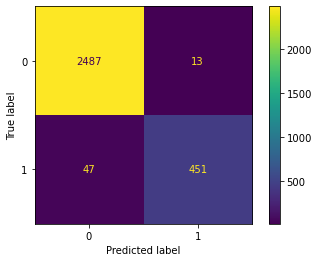

In [60]:
def conf_matrix (model, x_data, y_data):
    
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels = model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                                  display_labels = model.classes_)
    # Create display and make values non-scientific
    disp.plot(values_format = '')
    # Plot visual in-line
    plt.show()
    
# Construct confusion matrix for predicted and test values
conf_matrix(xgb_cv, X_test, y_test)

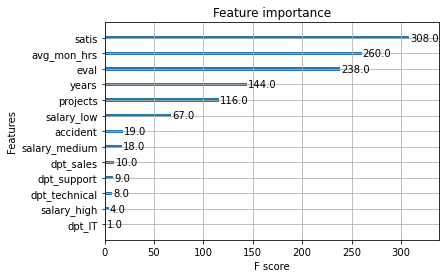

In [50]:
plot_importance(xgb_cv.best_estimator_)

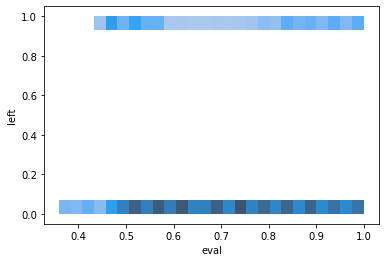

In [62]:
sns.histplot(data = df2, x='eval', y='left')

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



The top 5 most influential factors on whether or not someone will churn are, in order; satisfaction, average monthly hours, evaluation, tenure, and projects. The most impactful thing that can be done to reduce churn is to increase satisfaction.

I'd recommend that the managers/company utilize this model to identify employees that are at high risk of churn and work to increase at-risk employees' satisfaction with their work. 

It also appears that there is a sweet spot for employee evaluations between .65 and .75, potentially signalling that employees that have a path for improvement, but aren't doing poorly at their work are more likely to stay.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

The constructed model's metrics are as follows: accuracy: 98%, recall: 90.5%, precision: 97%, f1: 94%. This means that the model places employees in the correct churn category 98% of the time and is more prone to predicting an employee wont churn when they will, compared to predicting an employee will churn when they will not.

### Conclusion, Recommendations, Next Steps

I'd recommend that the managers/company utilize this model to identify employees that are at high risk of churn and work to increase at-risk employees' satisfaction with their work. 

It also appears that there is a sweet spot for employee evaluations between .65 and .75, potentially signalling that employees that have a path for improvement, but aren't doing poorly at their work are more likely to stay. Managers should be aware of this and be sure to identify a medium amount of growth points for all employees.

This model could be calibrated to reduce the number of false negatives(predicted non-churners that churn) if the stakeholders so desire. This would likely result in a model that leads to over-investment in employees that wouldn't churn anyway.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.